In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import pandas as pd


def AdaBoost_scratch(X,y, M, learning_rate, depth = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M
    for m in range(M):   

        #Fit a classifier
        estimator = DecisionTreeClassifier(max_depth = depth)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        #Misclassifications
        incorrect = (y_predict != y)

        #Estimator error
        estimator_error = np.mean( np.average(incorrect, weights=sample_weight, axis=0))
        
        #Boost estimator weights
        estimator_weight =  learning_rate * np.log((1. - estimator_error) / estimator_error)

        #Boost sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        #Save iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    #Predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    
    print('')
    print('Accuracy = ', (preds == y).sum() / N) 
    print('')
    
    return estimator_list, estimator_weight_list, sample_weight_list

def plot_AdaBoost_scratch_boundary(estimators,estimator_weights, X, y, N = 10,ax = None ):
    
    def AdaBoost_scratch_classify(x_temp, est,est_weights ):
        '''Return classification prediction for a given point X and a previously fitted AdaBoost'''
        temp_pred = np.asarray( [ (e.predict(x_temp)).T* w for e, w in zip(est,est_weights )]  ) / est_weights.sum()
        return np.sign(temp_pred.sum(axis = 0))
    
    
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))


    zz = np.array( [AdaBoost_scratch_classify(np.array([xi,yi]).reshape(1,-1), estimators,estimator_weights ) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')
    
def adaboost_steps(df, L=1):
    df['Stump 1']=np.sign(x2-2.5).astype(int)
    df['Weight 1'] = np.repeat(1/len(df), len(df))
    e1 = df[df['Stump 1']*df['y']==-1]['Weight 1'].sum()

    alpha1 = L*.5*np.log((1-e1)/e1)
    alpha1
    df['Weight 2'] = df['Weight 1']*np.exp(alpha1*(-df['y']*df['Stump 1']))
    df['Weight 2'] = df['Weight 2']/sum(df['Weight 2'])
    df

    df['Stump 2']=-np.sign(x1-1.5).astype(int)
    
    e2 = df[df['Stump 2']*df['y']==-1]['Weight 2'].sum()

    alpha2 = L*.5*np.log((1-e2)/e2)
    df['Weight 3'] = df['Weight 2']*np.exp(alpha2*(-df['y']*df['Stump 2']))
    df['Weight 3'] = df['Weight 3']/sum(df['Weight 3'])

    df['Stump 3']=-np.sign(x1-4.5).astype(int)
    e3 = df[df['Stump 3']*df['y']==-1]['Weight 3'].sum()

    alpha3 = L*.5*np.log((1-e3)/e3)
    
    print('')
    print('Voting Power of Stump 1:', np.round(alpha1, decimals=4))
    print('Voting Power of Stump 2:', np.round(alpha2, decimals=4))
    print('Voting Power of Stump 3:', np.round(alpha3, decimals=4))
    print('')

    return df

# Data

<Axes: xlabel='$X_1$', ylabel='$X_2$'>

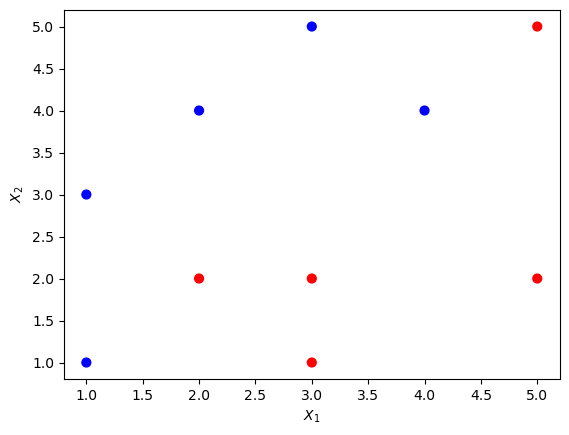

In [2]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax
#plt.savefig('ada_scatter.png')

# Effect of Number of Rounds

Change round to see the effect


Accuracy =  0.7



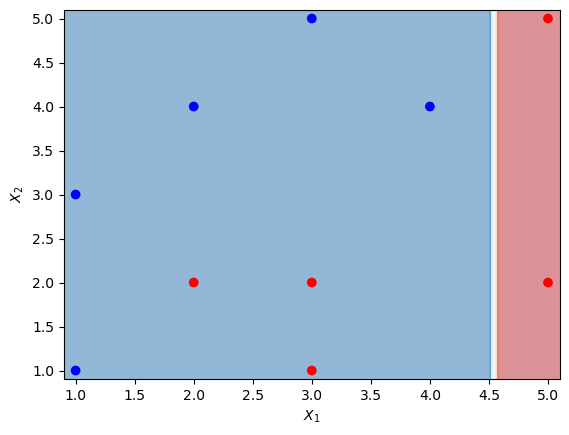

In [3]:
round = 6
L = 2 # learning rate

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=round, depth = 1, 
                                                                              learning_rate = L)

plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

# Effect of Learning Rate

Change learning rate to see the effect


Accuracy =  1.0



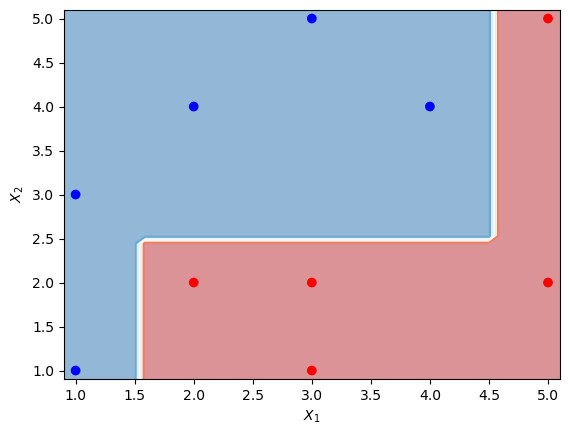

In [4]:
round = 3
L = 1

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=round, depth = 1, 
                                                                              learning_rate = L)

plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

In [5]:
ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 30):
    for lr in [2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = pd.concat(ac, pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy']), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

SyntaxError: '(' was never closed (1307138150.py, line 7)

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\sonou\AppData\Local\Temp\ipykernel_2680\2740796921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]],
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\sonou\AppData\Local\Temp\ipykernel_2680\2740796921.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]],
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `ba

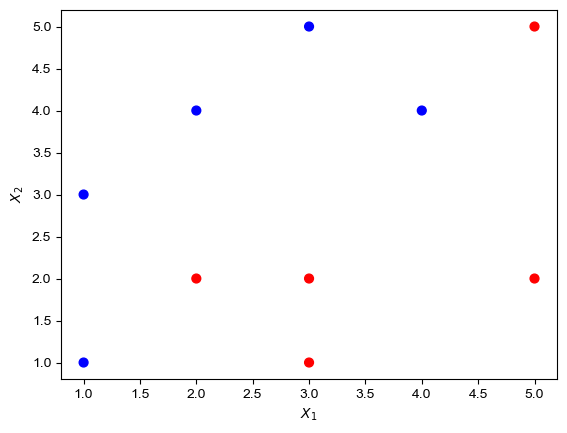

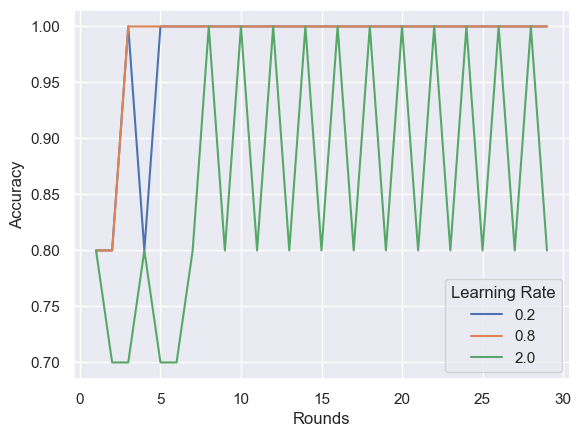

In [6]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1])

X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 30):
    for lr in [.2,.8, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [7]:
fig = ax.get_figure()
fig.savefig('learning_rate_vs_accuracy.png')

Another dataset

C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\sonou\AppData\Local\Temp\ipykernel_2680\218935439.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]],
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\sonou\AppData\Local\Temp\ipykernel_2680\218935439.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]],
C:\Users\sonou\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base

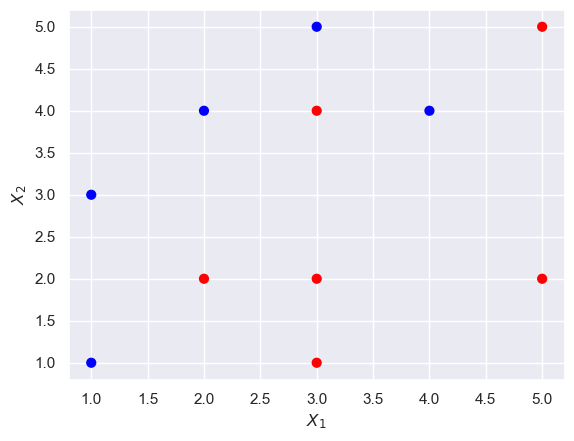

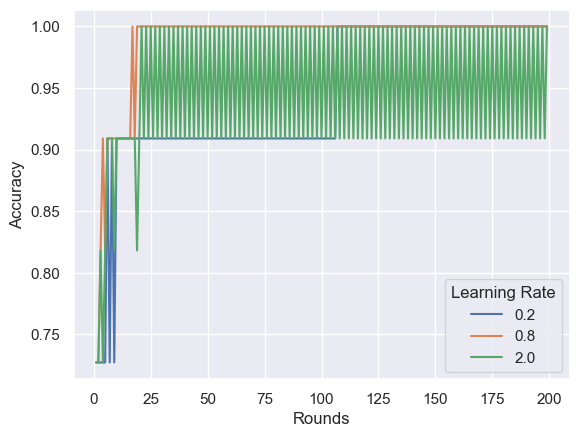

In [8]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 3])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 4])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])

X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 200):
    for lr in [.2,.8, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

# Tricky Data to Learn

In [ ]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 1])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()


In [ ]:
round = 20
L = 1

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=round, depth = 2, 
                                                                              learning_rate = L)

plot_AdaBoost_scratch_boundary(estimator_list, estimator_weight_list, X, y, N = 50 )

## Can Adaboost completely solve this?

In [ ]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 1])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 5])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, -1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 50):
    for lr in [.2,1, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=3), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [ ]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 4])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 2])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, 1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 100):
    for lr in [.2, 1, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

In [ ]:
x1 = np.array([1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 4])
x2 = np.array([1, 3, 2, 4, 1, 2, 5, 4,   2, 5, 3])
y = np.array([ 1, 1,-1, 1,-1, -1, 1, 1,  -1,-1, 1])


X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

ax = plt.gca()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
scatter_weights = np.ones(len(y))
ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights* 40)

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')

ax

plt.figure()

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
for rs in range(1, 50):
    for lr in [.05, 1, 2]:
        boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=rs, learning_rate=lr)
        boost.fit(X,y)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(X,y) ]], 
                                    columns=list(['Rounds','Learning Rate','Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)

# Calculation

In [ ]:
adaboost_steps(df, L=1)

In [ ]:
#Toy Dataset
x1 = np.array([1, 1, 2, 2, 3, 3])
x2 = np.array([2, 1, 4, 5, 1, 2])
y = np.array([ 1, 1,-1, -1,1, -1])
X = np.vstack((x1,x2)).T
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})

adaboost_steps(df, L=1)